In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

##1. Прочитаем данные в raw формате из github

Постановка задачи: будем классифицировать музыку по базовым 11 жанрам( Rock - 10, Indie/Alt - 6, Pop - 9, Metal - 8, HipHop - 5 , Alt_Music - 1, Blues - 2, Acoustic/Folk - 0, Instrumental - 7, Country - 4, Bollywood - 3) с помощью характеристик музыки (темпа, наличия слов, громкости, "энергичности", длительности(например , акустические композиции или классический рок как правило более длинные, а поп и популярные хипхоп композиции часто длятся до 5 минут)), популярности.



In [34]:
url = 'https://raw.githubusercontent.com/ishibyeva/ml_homework/main/music_genres_train.csv'
data = pd.read_csv(url)

In [35]:
data.shape

(17996, 17)

##2. Визуализация данных и вычисление основных характеристик 

In [36]:
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [37]:
data.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


In [38]:
data.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [39]:
data.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [40]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Можем увидеть, что для некоторых признаков есть пропущенные значения. 
В датасете присутствует самая разная по жанру музыка, много энергичной и танцевальной музыки. Средняя песня длится около 4 минут.

У нас есть один бинарный признак(mode), остальные - числовые(кроме имени исполнителя и названия песни).


In [41]:
data['Artist Name'].dtype

dtype('O')

In [42]:
from sklearn import preprocessing
data["Artist Name"] = data["Artist Name"].astype(str)

number = preprocessing.LabelEncoder()
data["Artist Name"] = number.fit_transform(data["Artist Name"])

Попробуем найти какую-нибудь зависимость

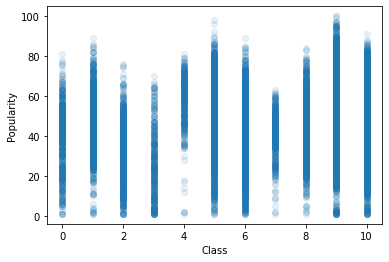

In [43]:
plt.scatter(data['Class'], data['Popularity'], alpha=0.1)
plt.xlabel('Class')
plt.ylabel('Popularity')
pass

Вполне ожидаемо, что поп-музыка и хип-хоп оказались самым популярным жанром(9 и 5). Однако, можно также заметить, что значения для жанра кантри концентрируются в промежутке от 40 до 80. Отсюда можно предположить, что у этото жанра есть определенная аудитория. 

In [44]:
corr_mat = data.corr()
corr_mat

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Artist Name,1.000000,-0.008630,-0.007430,0.035844,0.004311,0.014449,0.008572,-0.016490,-0.042133,-0.000341,-0.007963,0.019149,0.017747,0.036944,0.017058,-0.005892
Popularity,-0.008630,1.000000,0.167213,0.051538,0.005901,0.124915,0.016584,0.031664,-0.125410,-0.167661,-0.072298,0.054824,-0.006050,-0.031118,0.067062,0.161072
danceability,-0.007430,0.167213,1.000000,-0.093838,0.006702,0.059723,-0.067135,0.199042,0.009055,-0.200752,-0.109485,0.444548,-0.183527,-0.121624,0.137455,-0.097681
energy,0.035844,0.051538,-0.093838,1.000000,0.015934,0.767869,-0.035880,0.125427,-0.745963,-0.180276,0.195634,0.222998,0.210224,0.245768,0.145281,0.217328
key,0.004311,0.005901,0.006702,0.015934,1.000000,0.002660,-0.112452,0.001822,-0.009112,0.001411,0.015125,0.031744,0.013965,0.014547,0.006965,-0.007829
loudness,0.014449,0.124915,0.059723,0.767869,0.002660,1.000000,-0.033650,0.096027,-0.612824,-0.343672,0.112022,0.181086,0.164272,0.172010,0.127775,0.177872
mode,0.008572,0.016584,-0.067135,-0.035880,-0.112452,-0.033650,1.000000,-0.074609,0.024035,-0.026771,-0.001563,-0.002986,0.021211,-0.069307,-0.019989,-0.044740
speechiness,-0.016490,0.031664,0.199042,0.125427,0.001822,0.096027,-0.074609,1.000000,-0.086648,-0.067632,0.070406,0.053885,0.048948,0.005044,0.056237,-0.059349
acousticness,-0.042133,-0.125410,0.009055,-0.745963,-0.009112,-0.612824,0.024035,-0.086648,1.000000,0.174139,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936,-0.237138
instrumentalness,-0.000341,-0.167661,-0.200752,-0.180276,0.001411,-0.343672,-0.026771,-0.067632,0.174139,1.000000,-0.047189,-0.228144,-0.038586,-0.004551,-0.061745,-0.025343


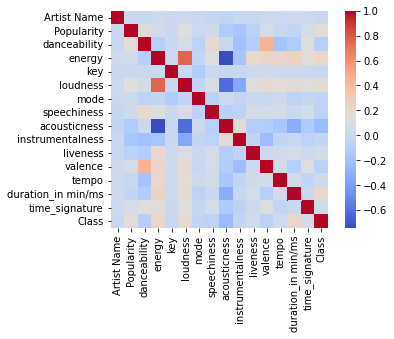

In [45]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Можем заметить самую сильную корреляцию между жанром и длительностью песни и энергией 

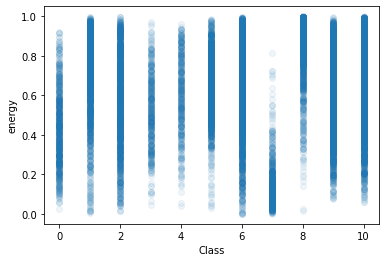

In [46]:
plt.scatter(data['Class'], data['energy'], alpha=0.07)
plt.xlabel('Class')
plt.ylabel('energy')
pass

Самые энергичные жанры - жанры, которые относятся билизко к року. Самый неэнергичный - инструментал. 

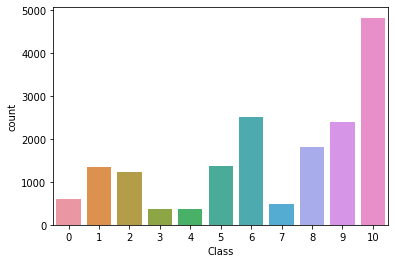

In [82]:
sns.countplot(x='Class', data=data)
pass

Видим, что классы несбалансированы.

##3. Обработка пропущенных значений 

In [48]:
data.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Видим, что есть пропущенные значения. Попробуем это исправить с помощью заполнения модой.

In [49]:
data['Popularity'].fillna(data['Popularity'].mode().iloc[0], inplace=True)
data['key'].fillna(data['key'].mode().iloc[0], inplace=True)
data['instrumentalness'].fillna(data['instrumentalness'].mode().iloc[0], inplace=True)
data.describe()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,4580.629584,44.452378,0.543433,0.662777,6.069682,-7.910660,0.636753,0.079707,0.247082,0.134402,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,2651.222266,17.222691,0.166268,0.235373,3.030700,4.049151,0.480949,0.083576,0.310632,0.275238,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,0.000000,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,2279.000000,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000109,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,4584.000000,43.000000,0.545000,0.700000,7.000000,-7.016000,1.000000,0.047400,0.081400,0.000343,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,6925.000000,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.056600,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,9148.000000,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Видим, что больше нет пропущенных значений(в строке count одинаковые числа)

##4.Обработка категориальных признаков


Нам повезло, у нас не оказалось необраотанных категориальных признаков. Единственный бинарный признак уже представлен как числовой.

##5. Борьба с выбросами

Построим ящики с усами, чтобы убедиться, что выбросы у нас есть.

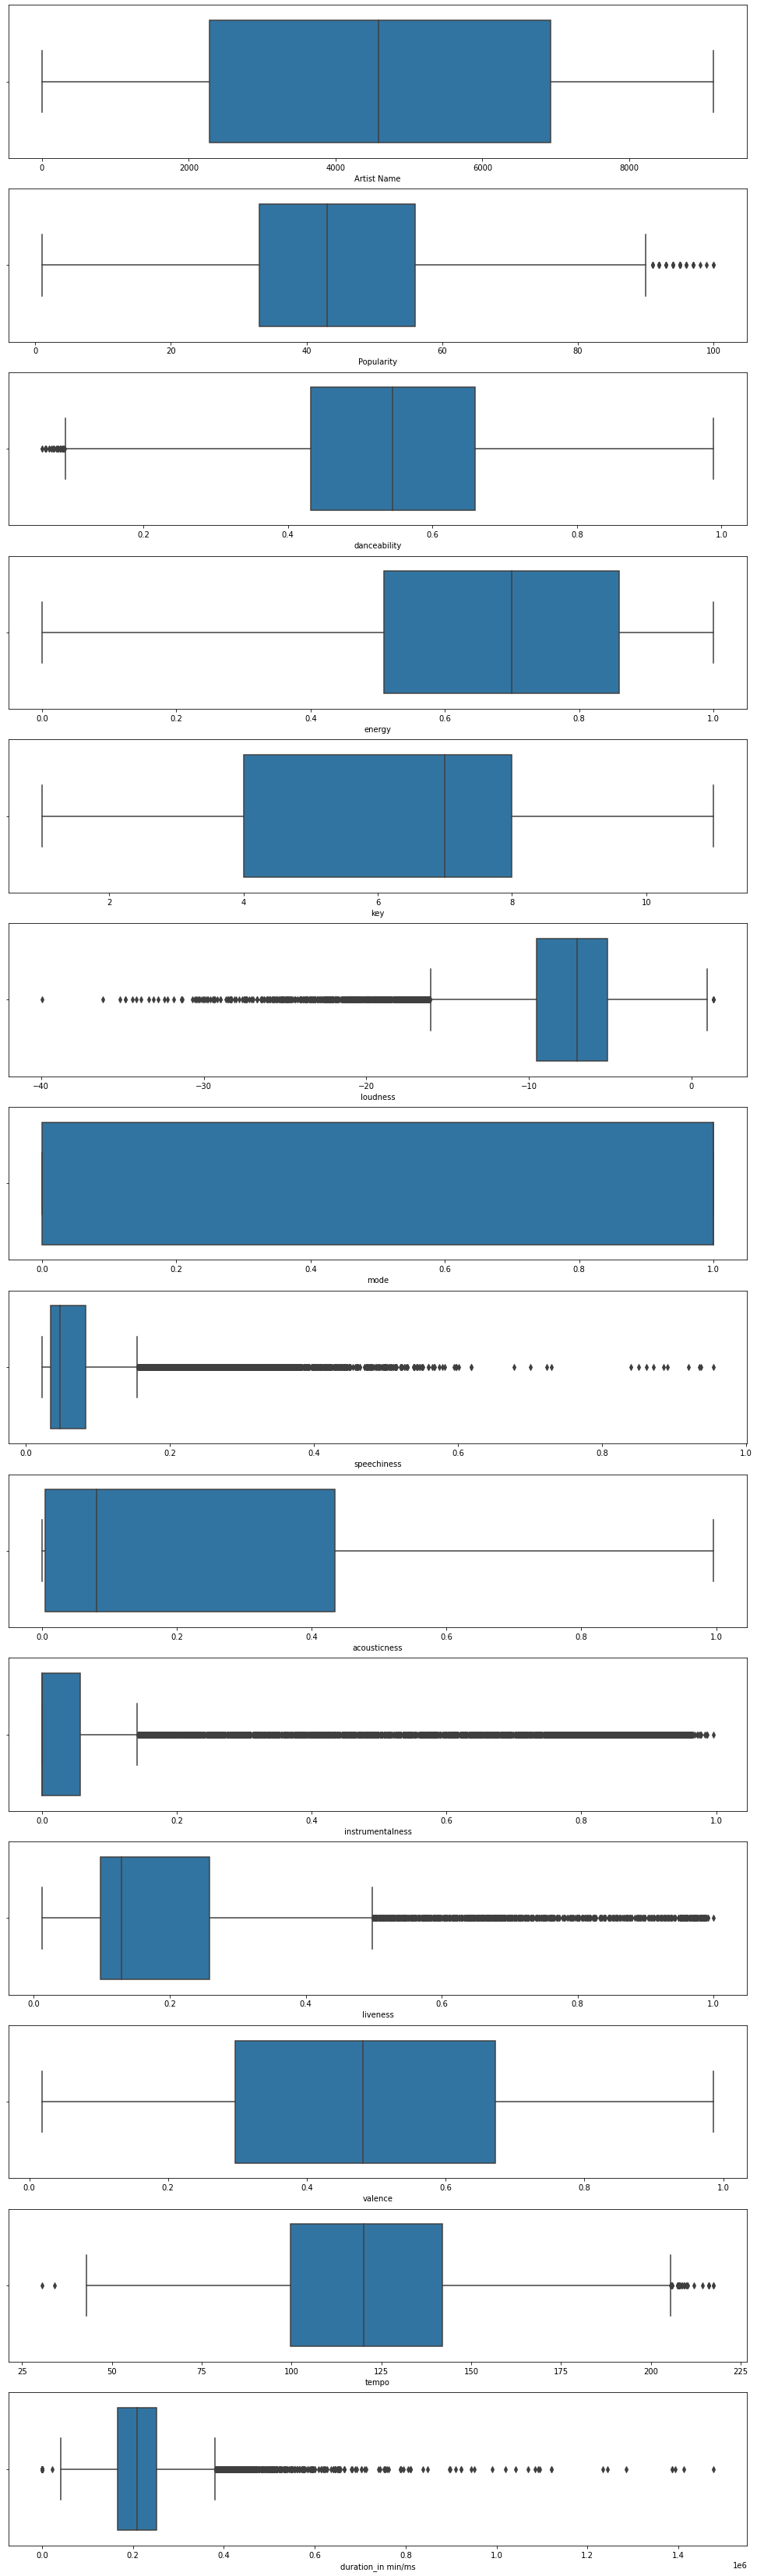

In [50]:
num_cols = [x for x in data.columns if data[x].dtype in ['int64', 'float64'] and x != 'Class']
fig, axes = plt.subplots(14,1, figsize=(17,11))    
fig.set_figheight(60)
for i in range (0, 14):
    sns.boxplot(ax=axes[i], data=data, x=num_cols[i])
pass

In [51]:
data['speechiness'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0246
0.010    0.0253
0.050    0.0278
0.100    0.0298
0.500    0.0474
0.900    0.1710
0.950    0.2720
0.990    0.4200
0.995    0.4810
Name: speechiness, dtype: float64

In [52]:
data['duration_in min/ms'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         2.229320
0.010         2.466623
0.050         3.384288
0.100         4.378108
0.500    209160.000000
0.900    307247.000000
0.950    354629.250000
0.990    509169.650000
0.995    590764.675000
Name: duration_in min/ms, dtype: float64

In [53]:
data['loudness'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005   -25.286825
0.010   -22.610850
0.050   -15.603750
0.100   -12.930000
0.500    -7.016000
0.900    -3.935000
0.950    -3.318000
0.990    -2.218000
0.995    -1.828850
Name: loudness, dtype: float64

In [54]:
rows_to_drop = data[
    (data['loudness'] < data['loudness'].quantile(0.005)) | (data['loudness'] > data['loudness'].quantile(0.995)) | 
    (data['duration_in min/ms']  < data['duration_in min/ms'].quantile(0.005)) | (data['duration_in min/ms']  > data['duration_in min/ms'].quantile(0.995)) |
    (data['speechiness']  < data['speechiness'].quantile(0.005)) | (data['speechiness']  > data['speechiness'].quantile(0.995)) | 
    (data['Popularity']  < data['Popularity'].quantile(0.005)) | (data['Popularity']  > data['Popularity'].quantile(0.995))
    ].index
data = data.drop(rows_to_drop)
data.shape

(17326, 17)

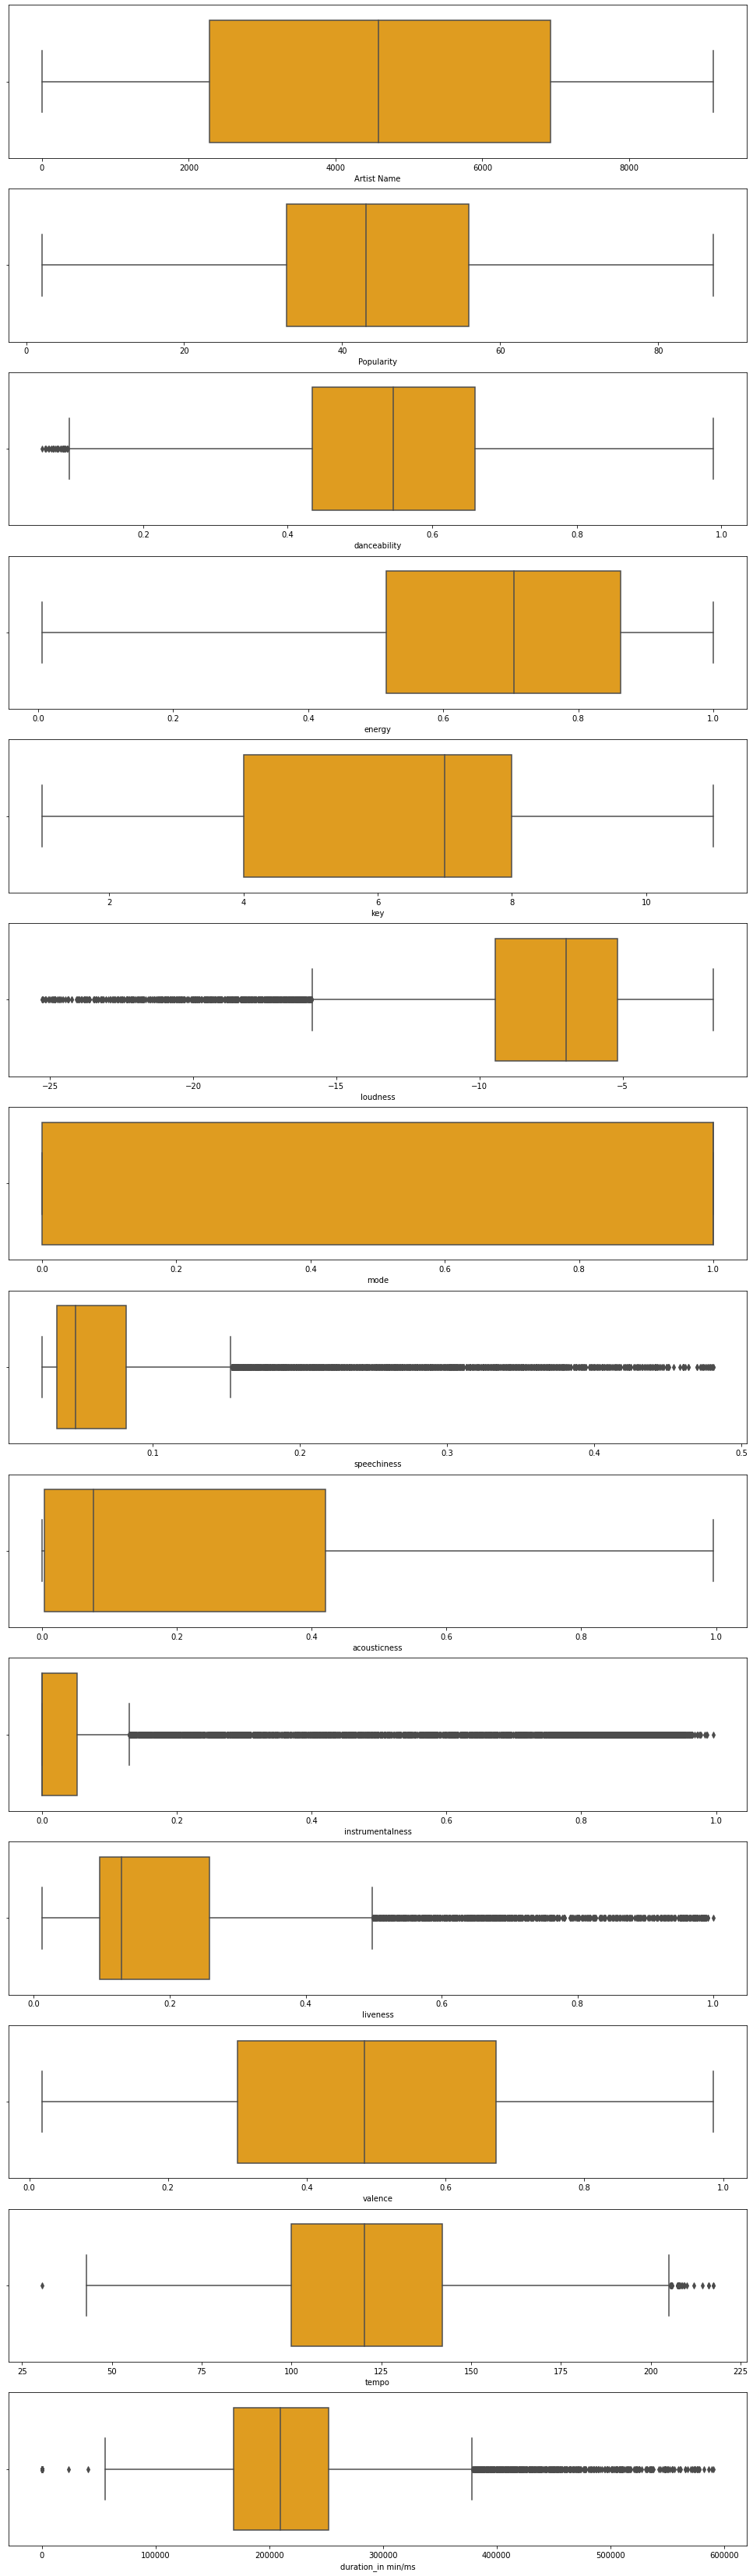

In [55]:
num_cols = [x for x in data.columns if data[x].dtype in ['int64', 'float64'] and x != 'Class']
fig, axes = plt.subplots(14,1, figsize=(17,11))    
fig.set_figheight(60)
for i in range (0, 14):
    sns.boxplot(ax=axes[i], data=data, x=num_cols[i], color='orange')
pass

Выбросы на выбранных нами признаках уменьшились

##6. Нормализация количественных признаков

In [56]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,Artist Name,Class,Popularity,acousticness,danceability,duration_in min/ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04,1.732600e+04
mean,-1.871090e-17,5.426162e-17,2.120764e-16,-1.332665e-15,-7.316348e-15,1.047865e-15,7.530402e-15,-2.333348e-14,2.297148e-16,3.388801e-15,4.541431e-15,-2.817401e-16,-8.547103e-17,-1.821341e-14,-6.444529e-16,3.264492e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.728466e+00,-2.082157e+00,-2.533611e+00,-7.870109e-01,-2.945339e+00,-1.975761e+00,-2.870448e+00,-4.814379e-01,-1.672336e+00,-1.162527e+00,-4.694040e+00,-1.323062e+00,-6.983010e-01,-3.135030e+00,-8.267263e+00,-1.967480e+00
25%,-8.684660e-01,-5.277299e-01,-6.842140e-01,-7.739200e-01,-6.724649e-01,-3.137896e-01,-6.570087e-01,-4.810392e-01,-6.831277e-01,-6.224190e-01,-4.445844e-01,-1.323062e+00,-5.636377e-01,-7.784262e-01,2.088953e-01,-7.878390e-01
50%,1.337115e-03,4.049261e-01,-8.763446e-02,-5.369458e-01,7.999838e-03,9.514557e-02,1.581906e-01,-4.802197e-01,3.060801e-01,-4.228002e-01,2.194601e-01,7.557786e-01,-3.979490e-01,-8.396486e-02,2.088953e-01,-2.151180e-02
75%,8.846189e-01,1.026697e+00,6.879189e-01,5.873678e-01,6.945401e-01,5.163681e-01,8.433050e-01,-2.905811e-01,6.358160e-01,3.920993e-01,7.009863e-01,7.557786e-01,6.083058e-02,6.497984e-01,2.088953e-01,7.741285e-01
max,1.720584e+00,1.026697e+00,2.537315e+00,2.464488e+00,2.699481e+00,3.854221e+00,1.441696e+00,3.195484e+00,1.625024e+00,5.079351e+00,1.601768e+00,7.557786e-01,5.327224e+00,3.210978e+00,3.034282e+00,2.084841e+00


In [57]:
data_stand.columns

Index(['Artist Name', 'Class', 'Popularity', 'Track Name', 'acousticness',
       'danceability', 'duration_in min/ms', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

В принципе, мы можем убрать признак track name, потому что здесь он выступает чем-то вроде id, а так же artist name(хотя можно было бы оставить его, конвертировав в число) 

In [58]:
del data['Track Name']
del data['Artist Name']
data.shape

(17326, 15)

In [59]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000,17326.000000
mean,44.468948,0.544683,0.667518,6.071742,-7.796632,0.636442,0.077492,0.241077,0.130412,0.195930,0.488137,122.868355,200194.457692,3.926065,6.697507
std,16.762224,0.164593,0.230618,3.032730,3.725654,0.481037,0.075744,0.306320,0.270878,0.158302,0.238801,29.445122,101324.126914,0.353934,3.216620
min,2.000000,0.059900,0.005540,1.000000,-25.285000,0.000000,0.024600,0.000000,0.000001,0.011900,0.018300,30.557000,2.232217,1.000000,0.000000
25%,33.000000,0.434000,0.516000,4.000000,-9.453000,0.000000,0.034800,0.004010,0.000109,0.097400,0.300000,99.947500,168400.000000,4.000000,5.000000
50%,43.000000,0.546000,0.704000,7.000000,-6.979000,1.000000,0.047350,0.076600,0.000331,0.129000,0.483000,120.396000,209835.000000,4.000000,8.000000
75%,56.000000,0.659000,0.862000,8.000000,-5.185000,1.000000,0.082100,0.421000,0.051700,0.258000,0.673000,142.001750,252515.000000,4.000000,10.000000
max,87.000000,0.989000,1.000000,11.000000,-1.829000,1.000000,0.481000,0.996000,0.996000,1.000000,0.986000,217.416000,590720.000000,5.000000,10.000000


##7.Разбиение данных на выборки

Разобъем на тестовую и обучающую выборку

In [60]:
data_stand.shape

(17326, 17)

In [61]:
data.shape

(17326, 15)

Выделим 30 процентов датасета под тестовую выборку:

In [62]:
from sklearn.model_selection import train_test_split
X = data_stand.drop(['Class', 'Track Name', 'Artist Name'], axis=1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 

N_train, N_test

(12128, 5198)

##8. Запуск классификатора ближайших соседей

Попробуем выбрать оптимальный параметр для метода ближайших соседей.

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

list_num = []
for i in range(1,41):
  list_num.append(i)
param_grid = {'n_neighbors': list_num}
knn = GridSearchCV(KNeighborsClassifier(), param_grid)
knn.fit(x_train, y_train)
knn_2 = pd.DataFrame(knn.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

print("Оптимальный параметр: ", knn.best_params_)

Оптимальный параметр:  {'n_neighbors': 32}


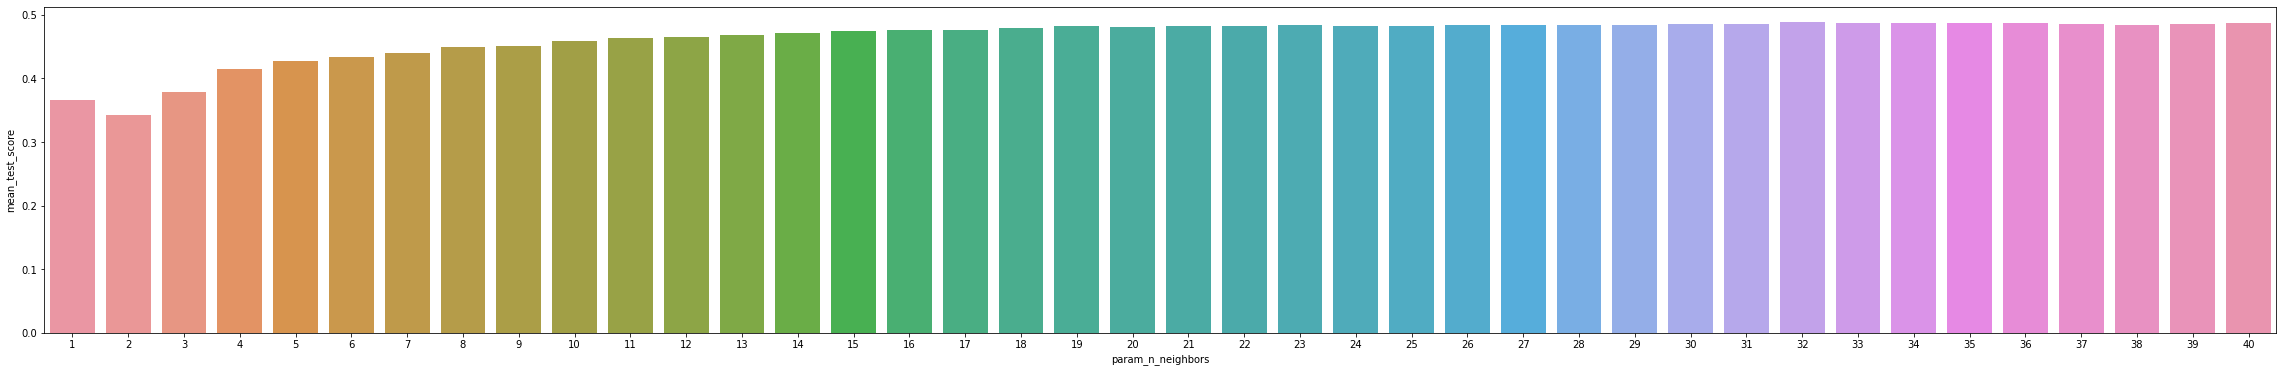

In [102]:
fig, axs = plt.subplots()
fig.set_size_inches(40, 6)
sns.barplot(x='param_n_neighbors', y='mean_test_score', data=knn_2)
pass

Попробуем несколько удачных значений - 19, 23, 32



In [105]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
score1 = np.mean(y_train != knn.predict(x_train))
score2 = np.mean(y_test  != knn.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.45893799472295516
Ошибка на тестовой выборке:  0.5186610234705656


In [106]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
score1 = np.mean(y_train != knn.predict(x_train))
score2 = np.mean(y_test  != knn.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.4634729551451187
Ошибка на тестовой выборке:  0.5198153135821469


In [107]:
knn = KNeighborsClassifier(n_neighbors = 32)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
score1 = np.mean(y_train != knn.predict(x_train))
score2 = np.mean(y_test  != knn.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.4752638522427441
Ошибка на тестовой выборке:  0.515390534821085


# Лучшие значения ошибки на обучающей выборки находятся около 46 процентов, на тестовой - около 52. 
# Не самый качественный результат можно объяснить небольшими корреляциями(нет ни одного значения, которое было бы больше *0.5*). Так же сам метод к ближайших соседей в нашем случае может быть не слишком удачным, скорее всего лучше попробовать другие.

Попробуем использовать Random forest и сравнить

In [110]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_train)
score1 = np.mean(y_train != model.predict(x_train))
score2 = np.mean(y_test  != model.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.0675296833773087
Ошибка на тестовой выборке:  0.5021161985378992


In [111]:
n_estimators = [100, 200, 300, 400, 600, 700, 1000]
max_depth = [1, 3, 7, 9, 13, 14, 15]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
model = GridSearchCV(RandomForestClassifier(), param_grid)
model.fit(x_train, y_train)
model_2 = pd.DataFrame(model.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

print("Оптимальный параметр: ", model.best_params_)

Оптимальный параметр:  {'max_depth': 9, 'n_estimators': 600}


Выбираем оптимальные параметры:

In [114]:
model = RandomForestClassifier(n_estimators = 600, max_depth = 9)
model.fit(x_train, y_train)
y_predict = model.predict(x_train)
score1 = np.mean(y_train != model.predict(x_train))
score2 = np.mean(y_test  != model.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.3787104221635884
Ошибка на тестовой выборке:  0.47960754136206235


Видим, что ситуация лучше, чем в случае метода к ближайших соседей, по крайней мере на обучающей выборке